## Prediction of Breast Tumor Malignancy with Deep Neural Network

I will make a computational model for breast tumor malignancy prediction with a deep neural network.

* Input dimensions are 569 (# of breast tumor tissues) x 30 (# of features),
* Output dimensions are 569 (# of breast tumor tissues) x 2 (malignant tumor score and benign tumor score).

My network architecture is **input -> [FC-softplus]xN -> FC -> cross entropy loss**.

I will use **Adam optimizer**.

## Load Data

In [5]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

# load training and validation datasets
Train = np.load('./Training.npy')
Valid = np.load('./Validation.npy')

nNumTrainData = Train.shape[0] # it should be 341 

## Set Hyperparameters

In [6]:
nNumEpochs = 30000 # number of epochs

# Hyperparameters (need to optimize)
nNumLayerList = [1, 2, 3, 4, 5] # number of hidden layers
nBatchSizeList = [16, 32, 64, 128] # batch size
fLearnRateList = [1e-2, 1e-3, 1e-4, 1e-5] # learning rate

## Model Architecture

In [7]:
# this model inputs 30 features and outputs 2 score nodes (malignant score and benign score)
# nNumLayer: the number of hidden layers
def model(X, nNumLayer):
    
    nNumHiddenNodesList = [] # contains the number of hidden nodes in each hidden layer
    nNumNodes = 30 # number of input nodes
 
    # define the number of hidden nodes in each hidden layer
    for nLayerNum in range(nNumLayer):
    
        nNumNodes *= np.power(2/30, 1/(nNumLayer + 1))
        nNumHiddenNodesList += [np.int32(nNumNodes)]
    
    
    # construct my model
    for nLayerNum in range(nNumLayer):
        
        X = tf.layers.dense(X, nNumHiddenNodesList[nLayerNum])
        X = tf.nn.softplus(X)
    
    X = tf.layers.dense(X, 2) # 2 output nodes
    
    return X

## Model Training

Let's first optimize the number of hidden layers. Fix learn_rate = 1e-4, batch_size = 32.

In [8]:
nBatchSize = 32
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 1 hidden layer
y = model(x, 1)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))                
        
plt.plot(valid_accuracy_list, label = "1 hidden layer")

Epoch: 21318, train accuracy: 0.974, valid accuracy: 0.956


In [9]:
nBatchSize = 32
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 2 hidden layers
y = model(x, 2)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "2 hidden layers")

Epoch: 18794, train accuracy: 0.994, valid accuracy: 0.974


In [10]:
nBatchSize = 32
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 3 hidden layers
y = model(x, 3)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "3 hidden layers")

Epoch: 21357, train accuracy: 0.956, valid accuracy: 0.982


In [11]:
nBatchSize = 32
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "4 hidden layers")

Epoch: 10744, train accuracy: 0.994, valid accuracy: 0.982


In [12]:
nBatchSize = 32
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 5 hidden layers
y = model(x, 5)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "5 hidden layers")

Epoch: 13500, train accuracy: 0.982, valid accuracy: 0.982
Epoch: 15087, train accuracy: 0.959, valid accuracy: 0.982
Epoch: 20778, train accuracy: 0.988, valid accuracy: 0.982
Epoch: 25687, train accuracy: 0.985, valid accuracy: 0.982
Epoch: 29476, train accuracy: 0.974, valid accuracy: 0.982


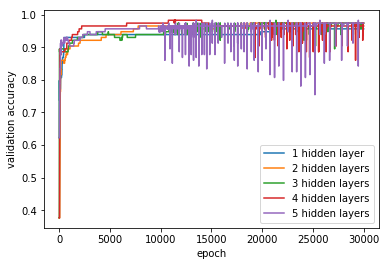

In [13]:
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()
plt.close()

## Batch Size Optimization
Set the number of hidden layers = 4. Fix learn_rate = 1e-4. Optimize the batch size.

In [14]:
nBatchSize = 16
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Batch size 16")

Epoch: 11586, train accuracy: 0.985, valid accuracy: 0.982
Epoch: 11754, train accuracy: 0.982, valid accuracy: 0.982
Epoch: 14913, train accuracy: 0.971, valid accuracy: 0.982
Epoch: 18858, train accuracy: 0.994, valid accuracy: 0.982
Epoch: 19417, train accuracy: 1.0, valid accuracy: 0.982
Epoch: 19422, train accuracy: 0.997, valid accuracy: 0.982
Epoch: 19902, train accuracy: 0.988, valid accuracy: 0.982
Epoch: 20799, train accuracy: 0.991, valid accuracy: 0.982
Epoch: 29790, train accuracy: 0.977, valid accuracy: 0.982


In [15]:
nBatchSize = 32
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Batch size 32")

Epoch: 10745, train accuracy: 0.994, valid accuracy: 0.982


In [16]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Batch size 64")

Epoch: 12098, train accuracy: 0.971, valid accuracy: 0.991


In [17]:
nBatchSize = 128
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Batch size 128")

Epoch: 23144, train accuracy: 0.988, valid accuracy: 0.974
Epoch: 23600, train accuracy: 0.985, valid accuracy: 0.974
Epoch: 23605, train accuracy: 0.977, valid accuracy: 0.974
Epoch: 24021, train accuracy: 0.982, valid accuracy: 0.974
Epoch: 24046, train accuracy: 0.979, valid accuracy: 0.974
Epoch: 24064, train accuracy: 0.991, valid accuracy: 0.974
Epoch: 24554, train accuracy: 0.965, valid accuracy: 0.974
Epoch: 24557, train accuracy: 0.971, valid accuracy: 0.974
Epoch: 24572, train accuracy: 0.994, valid accuracy: 0.974
Epoch: 25244, train accuracy: 0.962, valid accuracy: 0.974
Epoch: 25835, train accuracy: 0.968, valid accuracy: 0.974
Epoch: 25838, train accuracy: 0.974, valid accuracy: 0.974


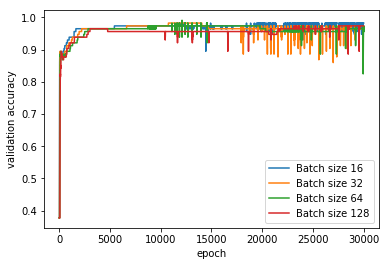

In [18]:
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()
plt.close()

## Learning Rate Optimization
Set the batch size = 64. Optimize the learning rate.

In [20]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-2).minimize(loss) # learn_rate = 1e-2

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Learning rate 1e-2")

Epoch: 0, train accuracy: 0.592, valid accuracy: 0.623


In [21]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-3).minimize(loss) # learn_rate = 1e-3

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Learning rate 1e-3")

Epoch: 1832, train accuracy: 0.994, valid accuracy: 0.982
Epoch: 1851, train accuracy: 0.991, valid accuracy: 0.982
Epoch: 3858, train accuracy: 0.971, valid accuracy: 0.982
Epoch: 3861, train accuracy: 0.977, valid accuracy: 0.982
Epoch: 11273, train accuracy: 0.982, valid accuracy: 0.982
Epoch: 11302, train accuracy: 0.979, valid accuracy: 0.982
Epoch: 11468, train accuracy: 0.985, valid accuracy: 0.982
Epoch: 17894, train accuracy: 0.988, valid accuracy: 0.982
Epoch: 18055, train accuracy: 0.997, valid accuracy: 0.982
Epoch: 18345, train accuracy: 1.0, valid accuracy: 0.982
Epoch: 19201, train accuracy: 0.974, valid accuracy: 0.982
Epoch: 23912, train accuracy: 0.965, valid accuracy: 0.982


In [22]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Learning rate 1e-4")

Epoch: 11663, train accuracy: 0.968, valid accuracy: 0.991
Epoch: 13064, train accuracy: 0.977, valid accuracy: 0.991


In [23]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-5).minimize(loss) # learn_rate = 1e-5

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Learning rate 1e-5")

Epoch: 25849, train accuracy: 0.947, valid accuracy: 0.93
Epoch: 27429, train accuracy: 0.95, valid accuracy: 0.93
Epoch: 28201, train accuracy: 0.944, valid accuracy: 0.93


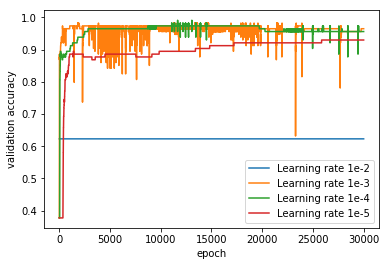

In [24]:
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()
plt.close()

## Batch Normalization
Set the learning rate = 1e-4. Next, let's add batch normalization layers.

In [25]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "No batch normalization")

Epoch: 11073, train accuracy: 0.991, valid accuracy: 0.982
Epoch: 11633, train accuracy: 0.977, valid accuracy: 0.982
Epoch: 11897, train accuracy: 0.988, valid accuracy: 0.982
Epoch: 12388, train accuracy: 0.985, valid accuracy: 0.982
Epoch: 12686, train accuracy: 0.994, valid accuracy: 0.982
Epoch: 14584, train accuracy: 0.979, valid accuracy: 0.982


In [26]:
# model architecture with batch normalization
def model_bn(X, nNumLayer, is_training):
    
    # define number of hidden nodes in each hidden layer
    nNumHiddenNodesList = []
    nNumNodes = 30
 
    for nLayerNum in range(nNumLayer):
    
        nNumNodes *= np.power(2/30, 1/(nNumLayer + 1))
        nNumHiddenNodesList += [np.int32(nNumNodes)]
    
    # construct my model
    for nLayerNum in range(nNumLayer):
        
        X = tf.layers.dense(X, nNumHiddenNodesList[nLayerNum])
        X = tf.layers.batch_normalization(X, training =  is_training)
        X = tf.nn.softplus(X)
    
    X = tf.layers.dense(X, 2)
    
    return X

In [27]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels
training = tf.placeholder(tf.bool)

# 4 hidden layers
y = model_bn(x, 4, training)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2], training: True})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2], training: True})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2], training: False})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2], training: False})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Batch normalization")

Epoch: 0, train accuracy: 0.408, valid accuracy: 0.377
Epoch: 1368, train accuracy: 0.405, valid accuracy: 0.377


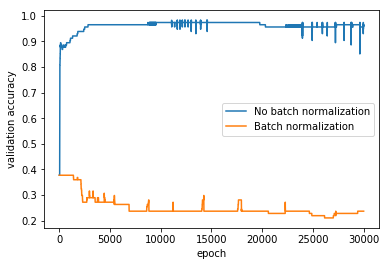

In [28]:
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()
plt.close()

## Dropout
No batch normalization! Next, let's add dropout layers.

In [29]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "No dropout")

Epoch: 11068, train accuracy: 0.991, valid accuracy: 0.982
Epoch: 11080, train accuracy: 0.988, valid accuracy: 0.982
Epoch: 11336, train accuracy: 0.985, valid accuracy: 0.982
Epoch: 12087, train accuracy: 0.979, valid accuracy: 0.982
Epoch: 12598, train accuracy: 0.994, valid accuracy: 0.982
Epoch: 15142, train accuracy: 0.968, valid accuracy: 0.982


In [30]:
# model architecture with dropout
def model_dropout(X, nNumLayer, is_training, dropout_rate):
    
    # define number of hidden nodes in each hidden layer
    nNumHiddenNodesList = []
    nNumNodes = 30
 
    for nLayerNum in range(nNumLayer):
    
        nNumNodes *= np.power(2/30, 1/(nNumLayer + 1))
        nNumHiddenNodesList += [np.int32(nNumNodes)]
    
    # construct my model
    for nLayerNum in range(nNumLayer):
        
        X = tf.layers.dropout(X, rate = dropout_rate, seed = 777, training = is_training)
        X = tf.layers.dense(X, nNumHiddenNodesList[nLayerNum])
        X = tf.nn.softplus(X)
    
    X = tf.layers.dropout(X, rate = dropout_rate, seed = 777, training = is_training)
    X = tf.layers.dense(X, 2)
    
    return X

In [31]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels
training = tf.placeholder(tf.bool)

# 4 hidden layers and dropout rate = 0.1
y = model_dropout(x, 4, training, 0.1)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2], training: True})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2], training: True})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2], training: False})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2], training: False})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Dropout rate 0.1")

Epoch: 10319, train accuracy: 0.921, valid accuracy: 0.912
Epoch: 10395, train accuracy: 0.924, valid accuracy: 0.912
Epoch: 10919, train accuracy: 0.918, valid accuracy: 0.912
Epoch: 11017, train accuracy: 0.927, valid accuracy: 0.912
Epoch: 11545, train accuracy: 0.915, valid accuracy: 0.912
Epoch: 12293, train accuracy: 0.93, valid accuracy: 0.912
Epoch: 12792, train accuracy: 0.933, valid accuracy: 0.912
Epoch: 13225, train accuracy: 0.935, valid accuracy: 0.912
Epoch: 19465, train accuracy: 0.912, valid accuracy: 0.912
Epoch: 25365, train accuracy: 0.938, valid accuracy: 0.912


In [32]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels
training = tf.placeholder(tf.bool)

# 4 hidden layers and dropout rate = 0.3
y = model_dropout(x, 4, training, 0.3)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2], training: True})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2], training: True})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2], training: False})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2], training: False})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Dropout rate 0.3")

Epoch: 29989, train accuracy: 0.848, valid accuracy: 0.868
Epoch: 29995, train accuracy: 0.85, valid accuracy: 0.868


In [33]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels
training = tf.placeholder(tf.bool)

# 4 hidden layers and dropout rate = 0.5
y = model_dropout(x, 4, training, 0.5)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2], training: True})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2], training: True})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2], training: False})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2], training: False})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Dropout rate 0.5")

Epoch: 3, train accuracy: 0.584, valid accuracy: 0.623
Epoch: 4, train accuracy: 0.587, valid accuracy: 0.623
Epoch: 6, train accuracy: 0.589, valid accuracy: 0.623
Epoch: 15, train accuracy: 0.592, valid accuracy: 0.623
Epoch: 50, train accuracy: 0.581, valid accuracy: 0.623


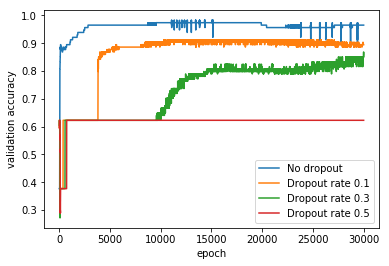

In [34]:
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()
plt.close()

## L2 Regularization
No dropout! This time, add L2 regularization to the cross entropy loss function.

In [35]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "No regularization")

Epoch: 12195, train accuracy: 0.971, valid accuracy: 0.991


In [36]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss

variables = tf.trainable_variables()
regularization = 1e-1 * tf.add_n([tf.nn.l2_loss(variable) for variable in variables if "bias" not in variable.name]) # regularization

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss + regularization) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Regularization with lambda = 1e-1")

Epoch: 1836, train accuracy: 0.927, valid accuracy: 0.921
Epoch: 3099, train accuracy: 0.93, valid accuracy: 0.921


In [37]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss

variables = tf.trainable_variables()
regularization = 1e-3 * tf.add_n([tf.nn.l2_loss(variable) for variable in variables if "bias" not in variable.name]) # regularization

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss + regularization) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Regularization with lambda = 1e-3")

Epoch: 3938, train accuracy: 0.953, valid accuracy: 0.956
Epoch: 4026, train accuracy: 0.95, valid accuracy: 0.956
Epoch: 4561, train accuracy: 0.956, valid accuracy: 0.956
Epoch: 4745, train accuracy: 0.959, valid accuracy: 0.956
Epoch: 5138, train accuracy: 0.962, valid accuracy: 0.956
Epoch: 6189, train accuracy: 0.965, valid accuracy: 0.956
Epoch: 8073, train accuracy: 0.968, valid accuracy: 0.956
Epoch: 10034, train accuracy: 0.971, valid accuracy: 0.956
Epoch: 11817, train accuracy: 0.974, valid accuracy: 0.956
Epoch: 12267, train accuracy: 0.977, valid accuracy: 0.956
Epoch: 15438, train accuracy: 0.982, valid accuracy: 0.956
Epoch: 18403, train accuracy: 0.985, valid accuracy: 0.956
Epoch: 19031, train accuracy: 0.988, valid accuracy: 0.956
Epoch: 19337, train accuracy: 0.991, valid accuracy: 0.956
Epoch: 25797, train accuracy: 0.994, valid accuracy: 0.956


In [38]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss

variables = tf.trainable_variables()
regularization = 1e-5 * tf.add_n([tf.nn.l2_loss(variable) for variable in variables if "bias" not in variable.name]) # regularization

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss + regularization) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Regularization with lambda = 1e-5")

Epoch: 3729, train accuracy: 0.971, valid accuracy: 0.982
Epoch: 12228, train accuracy: 0.988, valid accuracy: 0.982
Epoch: 12251, train accuracy: 0.997, valid accuracy: 0.982
Epoch: 12536, train accuracy: 0.994, valid accuracy: 0.982
Epoch: 12538, train accuracy: 0.991, valid accuracy: 0.982
Epoch: 12544, train accuracy: 0.977, valid accuracy: 0.982
Epoch: 12854, train accuracy: 0.974, valid accuracy: 0.982
Epoch: 12858, train accuracy: 0.965, valid accuracy: 0.982
Epoch: 12860, train accuracy: 0.962, valid accuracy: 0.982


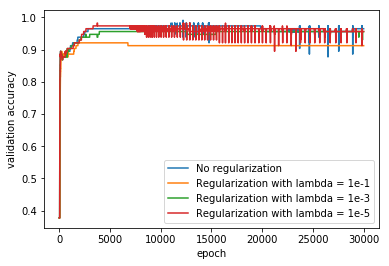

In [39]:
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()
plt.close()

## Ensemble Model
No regularization. Lastly, let's make an ensemble model of seven neural networks which have their own initial weights.

In [43]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Original model")

Epoch: 11094, train accuracy: 0.991, valid accuracy: 0.982
Epoch: 11106, train accuracy: 0.985, valid accuracy: 0.982
Epoch: 11361, train accuracy: 0.977, valid accuracy: 0.982
Epoch: 11868, train accuracy: 0.974, valid accuracy: 0.982
Epoch: 12145, train accuracy: 0.965, valid accuracy: 0.982
Epoch: 12454, train accuracy: 0.994, valid accuracy: 0.982
Epoch: 12469, train accuracy: 0.982, valid accuracy: 0.982
Epoch: 12473, train accuracy: 0.988, valid accuracy: 0.982
Epoch: 14478, train accuracy: 0.979, valid accuracy: 0.982


In [44]:
nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y1 = model(x, 4) # first model
y2 = model(x, 4) # second model
y3 = model(x, 4) # third model
y4 = model(x, 4) # fourth model
y5 = model(x, 4) # fifth model
y6 = model(x, 4) # sixth model
y7 = model(x, 4) # seventh model

# cross entropy loss
loss1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y1)) # first model loss
loss2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y2)) # second model loss
loss3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y3)) # third model loss
loss4 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y4)) # fourth model loss
loss5 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y5)) # fifth model loss
loss6 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y6)) # sixth model loss
loss7 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y7)) # seventh model loss

# majority voting
accuracy = tf.reduce_mean(tf.cast(tf.greater(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y1, 1)), tf.int8) + \
                                             tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y2, 1)), tf.int8) + \
                                             tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y3, 1)), tf.int8) + \
                                             tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y4, 1)), tf.int8) + \
                                             tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y5, 1)), tf.int8) + \
                                             tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y6, 1)), tf.int8) + \
                                             tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y7, 1)), tf.int8), 3), "float")) 

# learn_rate = 1e-4
train_step1 = tf.train.AdamOptimizer(1e-4).minimize(loss1) 
train_step2 = tf.train.AdamOptimizer(1e-4).minimize(loss2) 
train_step3 = tf.train.AdamOptimizer(1e-4).minimize(loss3) 
train_step4 = tf.train.AdamOptimizer(1e-4).minimize(loss4) 
train_step5 = tf.train.AdamOptimizer(1e-4).minimize(loss5) 
train_step6 = tf.train.AdamOptimizer(1e-4).minimize(loss6) 
train_step7 = tf.train.AdamOptimizer(1e-4).minimize(loss7) 

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        max_valid_acc = 0.0
        max_train_acc_list = []
        max_epoch_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run([train_step1, train_step2, train_step3, train_step4, train_step5, train_step6, train_step7], feed_dict = \
                         {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run([train_step1, train_step2, train_step3, train_step4, train_step5, train_step6, train_step7], feed_dict = \
                         {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})

            train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
            train_accuracy_list += [train_acc]
                
            valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
            valid_accuracy_list += [valid_acc]
            
            if valid_acc > max_valid_acc:
                
                max_valid_acc = valid_acc
                max_train_acc_list = [train_acc]
                max_epoch_list = [epoch]
        
            elif (valid_acc == max_valid_acc) and (train_acc not in max_train_acc_list): 
                
                max_train_acc_list += [train_acc]
                max_epoch_list += [epoch]
        
        for i in range(len(max_epoch_list)):
        
            print('Epoch: {}, train accuracy: {:.3}, valid accuracy: {:.3}'.format(max_epoch_list[i], max_train_acc_list[i], max_valid_acc))

plt.plot(valid_accuracy_list, label = "Ensemble model")

Epoch: 15551, train accuracy: 0.991, valid accuracy: 0.982
Epoch: 22872, train accuracy: 0.994, valid accuracy: 0.982
Epoch: 26628, train accuracy: 0.997, valid accuracy: 0.982


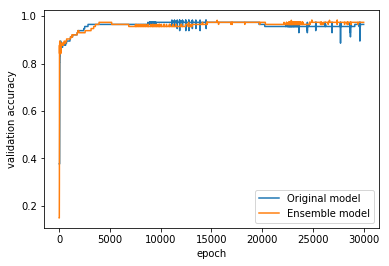

In [45]:
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()
plt.close()

## Save the Model and Calculate Test Accuracy
No ensemble!

In [58]:
nNumEpochs = 12454 # number of epochs

nBatchSize = 64
nNumTrainBatches = math.ceil(nNumTrainData / nBatchSize)

tf.reset_default_graph()
tf.set_random_seed(777)
np.random.seed(777)

x = tf.placeholder(tf.float32, [None, 30]) # input: 30 features of breast cancer tissues
label = tf.placeholder(tf.float32, [None, 2]) # true labels

# 4 hidden layers
y = model(x, 4)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = y)) # cross entropy loss
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label, 1), tf.argmax(y, 1)), "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss) # learn_rate = 1e-4

saver = tf.train.Saver()

with tf.Session() as sess:    

    with tf.device("/gpu:0") as dev:

        train_accuracy_list = []
        valid_accuracy_list = []
        
        tf.global_variables_initializer().run()

        for epoch in range(nNumEpochs):

            for it in range(nNumTrainBatches - 1):

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * it: nBatchSize * (it + 1), 2:], \
                                                  label: Train[nBatchSize * it: nBatchSize * (it + 1), 0:2]})

            if Train.shape[0] % nBatchSize != 0:

                sess.run(train_step, feed_dict = {x: Train[nBatchSize * (nNumTrainBatches - 1): , 2:], \
                                                  label: Train[nBatchSize * (nNumTrainBatches - 1): , 0:2]})
                
    save_path = saver.save(sess, "./model.ckpt")
    print("Model saved in path: %s" % save_path)

Model saved in path: ./model.ckpt


In [59]:
Test = np.load('./Test.npy')

with tf.Session() as sess:    

    saver.restore(sess, "./model.ckpt")
    
    print("Model restored.")
    
    train_acc = sess.run(accuracy, feed_dict = {x: Train[:, 2:], label: Train[:, 0:2]})
    test_acc = sess.run(accuracy, feed_dict = {x: Test[:, 2:], label: Test[:, 0:2]})
    valid_acc = sess.run(accuracy, feed_dict = {x: Valid[:, 2:], label: Valid[:, 0:2]})
    
print('train accuracy: {:.3}, test accuracy: {:.3}, valid accuracy: {:.3}'.format(train_acc, test_acc, valid_acc))

INFO:tensorflow:Restoring parameters from ./model.ckpt
Model restored.
train accuracy: 0.991, test accuracy: 0.965, valid accuracy: 0.982
